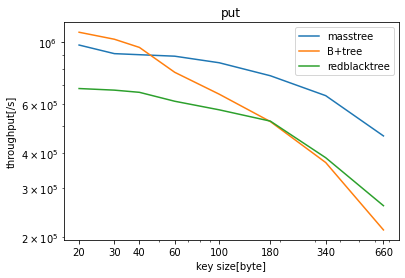

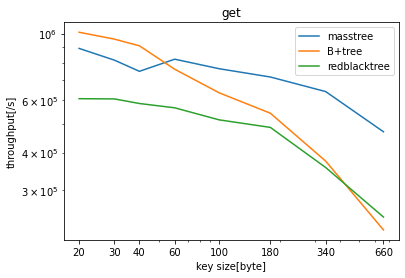

In [19]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot
import matplotlib.ticker as ptick

size_array = [10, 20, 40, 80, 160, 320, 640]

#size_array = [0,80,640]
def makefigure(operation):
    results_mass = []
    results_b = []
    results_rb =[]
    results_hm = []
    if(operation == 0):
        op = "put"
    if(operation == 1):
        op = "get"
    if(operation == 2):
        op = "getrange"
    if(operation == 3):
        op = "delete"

    xaxis = []
    for sz in size_array:
        #df = pd.read_csv("data/"+str(sz)+"prefix_20random(substring_removed).csv")
        df = pd.read_csv("data/0prefix_" + str(sz) + "random(substring_removed).csv")
        results_mass += df["Masstree"].values.tolist()
        results_b += df["B+tree"].values.tolist()
        results_rb += df["RedBlackTree"].values.tolist()
        results_hm += df["HashMap"].values.tolist()
        xaxis.append(sz)

    result_mass = []
    result_b = []
    result_rb = []
    result_hm = []
        
    # put
    for i in range(len(size_array)):
        result_mass.append(results_mass[i*4+operation])
        result_b.append(results_b[i*4+operation])
        result_rb.append(results_rb[i*4+operation])
        result_hm.append(results_hm[i*4+operation])
    
    fig = pyplot.figure()
    fig.subplots_adjust(left=0.2)
    ax = fig.add_subplot(111)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xticks(xaxis)
    ax.set_xticklabels(xaxis)
    #ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
    ax.yaxis.offsetText.set_fontsize(15)
    #ax.ticklabel_format(style="sci",axis="y",scilimits=(0,0))

    pyplot.title(op)
    pyplot.xlabel("key size[byte]")
    pyplot.ylabel("throughput[/s]")
    pyplot.plot(xaxis, result_mass, label="masstree")
    pyplot.plot(xaxis, result_b, label="B+tree")
    pyplot.plot(xaxis, result_rb, label="redblacktree")
    #pyplot.plot(xaxis, result_hm, label="hashmap")
    #pyplot.ylim(1000000,30000000)
    pyplot.legend()
    pyplot.savefig("graphs/" + op + "_10000000keys_random.svg", bbox_inches="tight")
    pyplot.show()
makefigure(0)
makefigure(1)
#makefigure(2)
#makefigure(3)